In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
# Load the dataset
data_path = 'data/CICIDS2017.csv' 
df = pd.read_csv(data_path)

# Show first few rows
df.head()


,id,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,1,192.168.10.50-192.168.10.3-56108-3268-6,192.168.10.50,56108,192.168.10.3,3268,6,2017-07-07 11:59:50.315195,112740690,32,...,343,1.610540e+07,4.988048e+05,16399772,15375229,-1,-1,112740690,BENIGN,-1
1,2,192.168.10.50-192.168.10.3-42144-389-6,192.168.10.50,42144,192.168.10.3,389,6,2017-07-07 11:59:50.316273,112740560,32,...,285,1.610543e+07,4.987937e+05,16399782,15375263,-1,-1,112740560,BENIGN,-1
2,3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2017-07-07 12:00:31.388567,113757377,545,...,19,1.221036e+07,6.935824e+06,20757030,5504997,-1,-1,0,BENIGN,-1
3,4,192.168.10.25-224.0.0.251-5353-5353-17,192.168.10.25,5353,224.0.0.251,5353,17,2017-07-07 12:00:42.903850,91997219,388,...,16,1.319764e+07,5.826905e+06,19776791,5817470,-1,-1,0,BENIGN,-1
4,5,192.168.10.25-17.253.14.125-123-123-17,192.168.10.25,123,17.253.14.125,123,17,2017-07-07 12:00:42.430758,66966070,6,...,1968172,6.497443e+07,0.000000e+00,64974431,64974431,-1,-1,0,BENIGN,-1


In [4]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values[missing_values > 0])

# Data types
df.dtypes


Shape of dataset: (547557, 91)

Column names:
 ['id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'F

id                      int64
Flow ID                object
Src IP                 object
Src Port                int64
Dst IP                 object
                        ...  
ICMP Code               int64
ICMP Type               int64
Total TCP Flow Time     int64
Label                  object
Attempted Category      int64
Length: 91, dtype: object


Label distribution:
 Label
BENIGN                288544
Portscan              159066
DDoS                   95144
Botnet - Attempted      4067
Botnet                   736
Name: count, dtype: int64


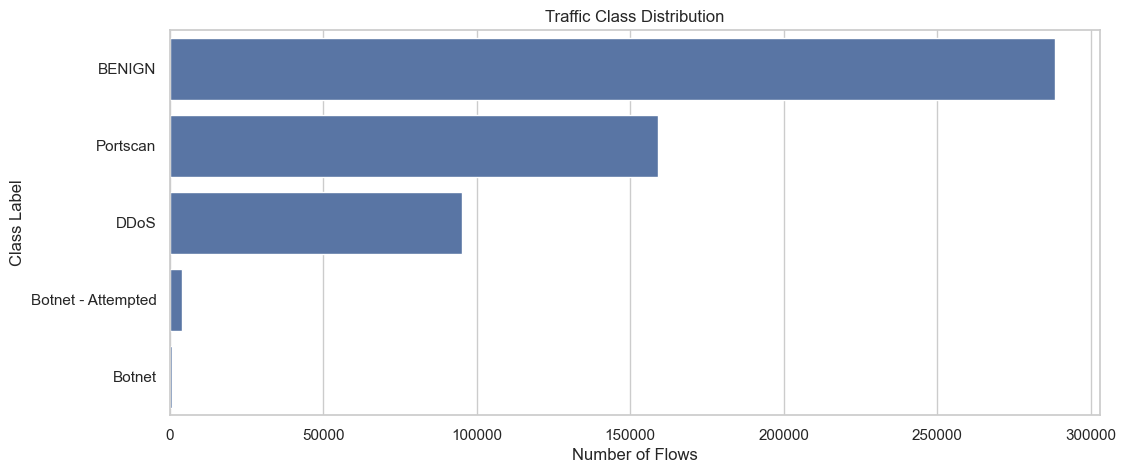

In [5]:
# Show number of records for each label
label_counts = df['Label'].value_counts()
print("\nLabel distribution:\n", label_counts)

# Plot label distribution
plt.figure(figsize=(12, 5))
sns.countplot(y='Label', data=df, order=label_counts.index)
plt.title("Traffic Class Distribution")
plt.xlabel("Number of Flows")
plt.ylabel("Class Label")
plt.show()
